In [1]:
import numpy as np
import pandas as pd
import matplotlib

In [2]:
a_df = pd.DataFrame({
    'Country': ['Germany', 'France', 'Belgium', 'Finland'],
    'Population (M)': [82.8, 67.2, 11.4, 5.5],
    'Capital': ['Berlin', 'Paris', 'Brussels', 'Helsinki']
})
a_df

,Country,Population (M),Capital
0,Germany,82.8,Berlin
1,France,67.2,Paris
2,Belgium,11.4,Brussels
3,Finland,5.5,Helsinki


In [3]:
b_df = pd.DataFrame({
    'Country': ['Germany', 'France', 'Belgium', 'Canada'],
    'HDI': [0.936, 0.901, 0.916, 0.926]
})
b_df

,Country,HDI
0,Germany,0.936
1,France,0.901
2,Belgium,0.916
3,Canada,0.926


In [12]:
inner_merge = a_df.merge(b_df, on='Country')
inner_merge

,Country,Population (M),Capital,HDI
0,Germany,82.8,Berlin,0.936
1,France,67.2,Paris,0.901
2,Belgium,11.4,Brussels,0.916


In [9]:
#=> We don't have the countries Finland and Canada anymore
##=> Let's go step by step

## Left merge

In [20]:
left_merge = a_df.merge(b_df, on='Country',how = 'left')
left_merge

,Country,Population (M),Capital,HDI
0,Germany,82.8,Berlin,0.936
1,France,67.2,Paris,0.901
2,Belgium,11.4,Brussels,0.916
3,Finland,5.5,Helsinki,NaN


## Right merge

In [17]:
right_merge = a_df.merge(b_df, on='Country',how = 'right')
right_merge

,Country,Population (M),Capital,HDI
0,Germany,82.8,Berlin,0.936
1,France,67.2,Paris,0.901
2,Belgium,11.4,Brussels,0.916
3,Canada,NaN,NaN,0.926


## Outer

In [22]:
outer_merged_df = a_df.merge(b_df, on='Country', how='outer')
outer_merged_df

,Country,Population (M),Capital,HDI
0,Germany,82.8,Berlin,0.936
1,France,67.2,Paris,0.901
2,Belgium,11.4,Brussels,0.916
3,Finland,5.5,Helsinki,NaN
4,Canada,NaN,NaN,0.926


## Join

In [24]:
aa_df =  a_df.set_index("Country")
aa_df

,Population (M),Capital
Country,,
Germany,82.8,Berlin
France,67.2,Paris
Belgium,11.4,Brussels
Finland,5.5,Helsinki


In [25]:
bb_df = b_df.set_index("Country")
bb_df

,HDI
Country,
Germany,0.936
France,0.901
Belgium,0.916
Canada,0.926


In [26]:
join_aa_bb = aa_df.join(bb_df)

,Population (M),Capital,HDI
Country,,,
Germany,82.8,Berlin,0.936
France,67.2,Paris,0.901
Belgium,11.4,Brussels,0.916
Finland,5.5,Helsinki,NaN


In [ ]:
# => Here Canada is missing

## Join all :

In [36]:
aa_df.join(bb_df,how = 'outer')

,Population (M),Capital,HDI
Country,,,
Belgium,11.4,Brussels,0.916
Canada,NaN,NaN,0.926
Finland,5.5,Helsinki,NaN
France,67.2,Paris,0.901
Germany,82.8,Berlin,0.936


In [37]:
# Merge function : for the same column
# Join function : for the same index 

## Concat

In [39]:
concat_df = pd.concat([a_df, b_df], axis="index", sort=False)
concat_df

,Country,Population (M),Capital,HDI
0,Germany,82.8,Berlin,NaN
1,France,67.2,Paris,NaN
2,Belgium,11.4,Brussels,NaN
3,Finland,5.5,Helsinki,NaN
0,Germany,NaN,NaN,0.936
1,France,NaN,NaN,0.901
2,Belgium,NaN,NaN,0.916
3,Canada,NaN,NaN,0.926


## Loading DATA from multiples CSV's

In [55]:
file = "C:\\Users\\handy\\Documents\\GitHub\\notebook\\dictionary.csv"
countries_df = pd.read_csv(file,decimal=',')
countries_df.head()

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081219966
1,Albania,ALB,2889167.0,3945.21758150914
2,Algeria,ALG,39666519.0,4206.03123244958
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN


In [68]:
countries_df[['Country','Code']]

,Country,Code
0,Afghanistan,AFG
1,Albania,ALB
2,Algeria,ALG
3,American Samoa*,ASA
4,Andorra,AND
...,...,...
196,Vietnam,VIE
197,Virgin Islands*,ISV
198,Yemen,YEM
199,Zambia,ZAM


In [69]:
file = "C:\\Users\\handy\\Documents\\GitHub\\notebook\\summer.csv"
summer_df = pd.read_csv(file,decimal=',')
summer_df

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


In [73]:
summer_df.rename(columns={"Country": "Code"}, inplace=True)
summer_df.head()

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [74]:
file = "C:\\Users\\handy\\Documents\\GitHub\\notebook\\winter.csv"
winter_df = pd.read_csv(file,decimal=',')
winter_df

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold
...,...,...,...,...,...,...,...,...,...
5765,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze
5766,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold
5767,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver
5768,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold


In [75]:
winter_df.rename(columns={"Country": "Code"}, inplace=True)
winter_df.head()

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold


## Merging the data

In [84]:
summer_countries_df = summer_df.merge(countries_df,on='Code')
summer_countries_df

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country,Population,GDP per Capita
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary,9844686.0,12363.5434596539
1,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold,Hungary,9844686.0,12363.5434596539
2,1896,Athens,Athletics,Athletics,"SZOKOLYI, Alajos",HUN,Men,100M,Bronze,Hungary,9844686.0,12363.5434596539
3,1896,Athens,Athletics,Athletics,"DANI, Nandor",HUN,Men,800M,Silver,Hungary,9844686.0,12363.5434596539
4,1896,Athens,Athletics,Athletics,"KELLNER, Gyula",HUN,Men,Marathon,Bronze,Hungary,9844686.0,12363.5434596539
...,...,...,...,...,...,...,...,...,...,...,...,...
25737,2012,London,Athletics,Athletics,"BARRONDO, Erick",GUA,Men,20KM Walk,Silver,Guatemala,16342897.0,3903.47885604613
25738,2012,London,Athletics,Athletics,"JAMES, Kirani",GRN,Men,400M,Gold,Grenada,106825.0,9212.02035173484
25739,2012,London,Athletics,Athletics,"AMOS, Nijel",BOT,Men,800M,Silver,Botswana,2262485.0,6360.13822018837
25740,2012,London,Sailing,Sailing,"KONTIDES, Pavlos",CYP,Men,Laser,Silver,Cyprus,1165300.0,23242.8400685313


In [86]:
winter_countries_df = winter_df.merge(countries_df,on='Code')
winter_countries_df

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country,Population,GDP per Capita
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze,France,66808385.0,36205.5681017036
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze,France,66808385.0,36205.5681017036
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze,France,66808385.0,36205.5681017036
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze,France,66808385.0,36205.5681017036
4,1924,Chamonix,Curling,Curling,"ALDEERT, H.",FRA,Men,Curling,Bronze,France,66808385.0,36205.5681017036
...,...,...,...,...,...,...,...,...,...,...,...,...
4821,2006,Turin,Skiing,Snowboard,"ZIDEK, Radoslav",SVK,Men,Snowboard Cross,Silver,Slovakia,5424050.0,16088.2775872723
4822,2010,Vancouver,Biathlon,Biathlon,"KUZMINA, Anastazia",SVK,Women,10KM Pursuit,Silver,Slovakia,5424050.0,16088.2775872723
4823,2010,Vancouver,Biathlon,Biathlon,"HURAJT, Pavol",SVK,Men,15KM Mass Start,Bronze,Slovakia,5424050.0,16088.2775872723
4824,2010,Vancouver,Biathlon,Biathlon,"KUZMINA, Anastazia",SVK,Women,7.5KM,Gold,Slovakia,5424050.0,16088.2775872723


In [87]:
summer_countries_df["Season"] = "Summer"
summer_countries_df

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country,Population,GDP per Capita,Season
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary,9844686.0,12363.5434596539,Summer
1,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold,Hungary,9844686.0,12363.5434596539,Summer
2,1896,Athens,Athletics,Athletics,"SZOKOLYI, Alajos",HUN,Men,100M,Bronze,Hungary,9844686.0,12363.5434596539,Summer
3,1896,Athens,Athletics,Athletics,"DANI, Nandor",HUN,Men,800M,Silver,Hungary,9844686.0,12363.5434596539,Summer
4,1896,Athens,Athletics,Athletics,"KELLNER, Gyula",HUN,Men,Marathon,Bronze,Hungary,9844686.0,12363.5434596539,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25737,2012,London,Athletics,Athletics,"BARRONDO, Erick",GUA,Men,20KM Walk,Silver,Guatemala,16342897.0,3903.47885604613,Summer
25738,2012,London,Athletics,Athletics,"JAMES, Kirani",GRN,Men,400M,Gold,Grenada,106825.0,9212.02035173484,Summer
25739,2012,London,Athletics,Athletics,"AMOS, Nijel",BOT,Men,800M,Silver,Botswana,2262485.0,6360.13822018837,Summer
25740,2012,London,Sailing,Sailing,"KONTIDES, Pavlos",CYP,Men,Laser,Silver,Cyprus,1165300.0,23242.8400685313,Summer


In [88]:
winter_countries_df["Season"] = "Winter"
winter_countries_df

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country,Population,GDP per Capita,Season
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze,France,66808385.0,36205.5681017036,Winter
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze,France,66808385.0,36205.5681017036,Winter
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze,France,66808385.0,36205.5681017036,Winter
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze,France,66808385.0,36205.5681017036,Winter
4,1924,Chamonix,Curling,Curling,"ALDEERT, H.",FRA,Men,Curling,Bronze,France,66808385.0,36205.5681017036,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4821,2006,Turin,Skiing,Snowboard,"ZIDEK, Radoslav",SVK,Men,Snowboard Cross,Silver,Slovakia,5424050.0,16088.2775872723,Winter
4822,2010,Vancouver,Biathlon,Biathlon,"KUZMINA, Anastazia",SVK,Women,10KM Pursuit,Silver,Slovakia,5424050.0,16088.2775872723,Winter
4823,2010,Vancouver,Biathlon,Biathlon,"HURAJT, Pavol",SVK,Men,15KM Mass Start,Bronze,Slovakia,5424050.0,16088.2775872723,Winter
4824,2010,Vancouver,Biathlon,Biathlon,"KUZMINA, Anastazia",SVK,Women,7.5KM,Gold,Slovakia,5424050.0,16088.2775872723,Winter


In [91]:
all_df = pd.concat([summer_countries_df, winter_countries_df], sort=False)
all_df

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country,Population,GDP per Capita,Season
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary,9844686.0,12363.5434596539,Summer
1,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold,Hungary,9844686.0,12363.5434596539,Summer
2,1896,Athens,Athletics,Athletics,"SZOKOLYI, Alajos",HUN,Men,100M,Bronze,Hungary,9844686.0,12363.5434596539,Summer
3,1896,Athens,Athletics,Athletics,"DANI, Nandor",HUN,Men,800M,Silver,Hungary,9844686.0,12363.5434596539,Summer
4,1896,Athens,Athletics,Athletics,"KELLNER, Gyula",HUN,Men,Marathon,Bronze,Hungary,9844686.0,12363.5434596539,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4821,2006,Turin,Skiing,Snowboard,"ZIDEK, Radoslav",SVK,Men,Snowboard Cross,Silver,Slovakia,5424050.0,16088.2775872723,Winter
4822,2010,Vancouver,Biathlon,Biathlon,"KUZMINA, Anastazia",SVK,Women,10KM Pursuit,Silver,Slovakia,5424050.0,16088.2775872723,Winter
4823,2010,Vancouver,Biathlon,Biathlon,"HURAJT, Pavol",SVK,Men,15KM Mass Start,Bronze,Slovakia,5424050.0,16088.2775872723,Winter
4824,2010,Vancouver,Biathlon,Biathlon,"KUZMINA, Anastazia",SVK,Women,7.5KM,Gold,Slovakia,5424050.0,16088.2775872723,Winter


## Top 10 Countries since 1984

In [96]:
all_count_df = all_df[all_df["Year"] >= 1984] \
    .groupby(["Country"]) \
    .count()[["Medal"]] \
    .sort_values(by="Medal", ascending=False)
all_count_df.head(10)

,Medal
Country,
United States,2472
Germany,1112
Russia,1031
Australia,891
China,889
Canada,801
Italy,632
"Korea, South",587
France,587


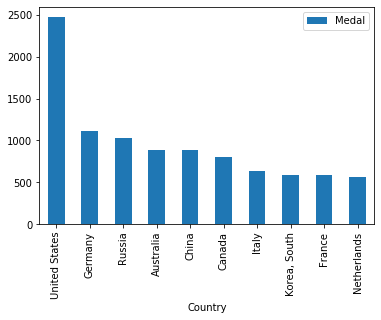

In [98]:
all_count_df.head(10).plot(kind="bar")